The DBSCAN Clustering algorithm is based on the concept of core samples, non-core samples, and outliers:

1.Core Samples: The samples present in the high-density area have minimum sample points with the eps radius.

2.Non-core samples: The samples close to core samples but are not core samples but are very near to the core samples. The no-core samples lie within the eps radius of the core samples but they don’t have minimum samples points.

3.Outliers: The samples that are not part of the core samples and the non-core samples and are far away from all the samples.
The DBSCAN clustering algorithm works well if all the clusters are dense enough and are well represented by the low-density regions.

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv("general.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Before moving forward let’s have a look at the null values in the dataset:



In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

So we have some null values in the Maximum Payments column. I will fill these values with the average values and here I will also remove the customer id column as it is useless:

In [5]:
data = data.drop('CUST_ID', axis=1)

In [4]:
data.fillna(data.mean(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2956\1474580016.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Now let’s scale and normalize the dataset:



In [6]:
# scaling and normalizing the dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
from sklearn.preprocessing import normalize
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

Now I will implement the Principal Component Analysis (PCA) algorithm in machine learning to reduce the dimensionality of the data for visualization:

In [7]:
# reduce the dimensionality of the dataset
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

         V1        V2
0 -0.489826 -0.679678
1 -0.518791  0.545011
2  0.330885  0.268977
3 -0.482374 -0.092110
4 -0.563289 -0.481915


Now let’s implement the DBSCAN algorithm and have a look at the data and the clusters after implementing it:



In [8]:
dbscan = DBSCAN(eps=0.036, min_samples=4).fit(x_principal)
labels = dbscan.labels_
data['cluster'] = dbscan.labels_
print(data.tail())

         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945   28.493517           1.000000     291.12              0.00   
8946   19.183215           1.000000     300.00              0.00   
8947   23.398673           0.833333     144.40              0.00   
8948   13.457564           0.833333       0.00              0.00   
8949  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                

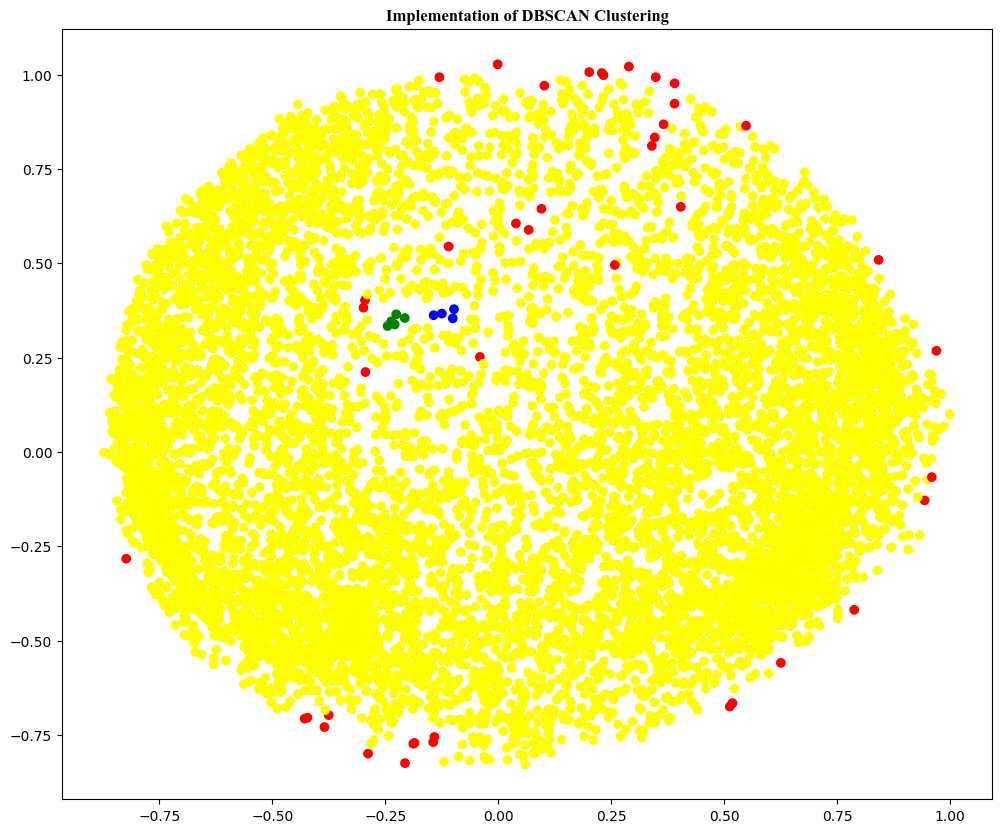

In [9]:
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12, 10))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()

DBSCAN clustering algorithm is a very simple and powerful clustering algorithm in machine learning. It can identify any cluster of any shape. It is robust to outliers and has only two hyperparameters. It may be difficult for it to capture the clusters properly if the cluster density increases significantly